 For linear models for regression, the output, ŷ, is a linear function of the features: a
 line, plane, or hyperplane (in higher dimensions). For linear models for classification,
 the decision boundary is a linear function of the input. <br><br>

The two most common linear classification algorithms are logistic regression, imple
mented in linear_model.LogisticRegression, and linear support vector machines
 (linear SVMs), implemented in svm.

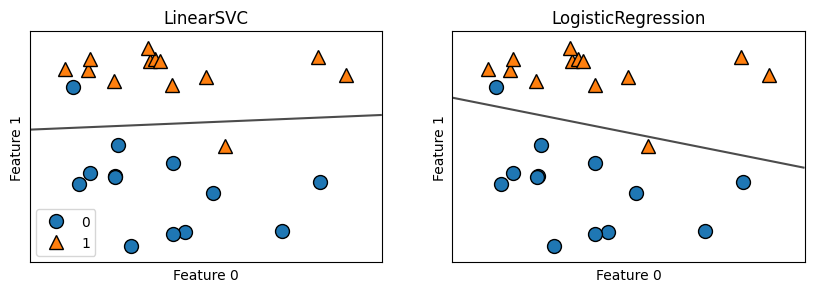

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt


X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()
    

We display the decision boundaries found by
 LinearSVC and LogisticRegression respectively as straight lines, separating the area
 classified as class 1 on the top from the area classified as class 0 on the bottom. In
 other words, any new data point that lies above the black line will be classified as class
 1 by the respective classifier, while any point that lies below the black line will be clas
sified as class 0.

The two models come up with similar decision boundaries. Note that both misclas
sify two of the points. By default, both models apply an L2 regularization, in the same
 way that Ridge does for regression. <br><br>
 For LogisticRegression and LinearSVC the trade-off parameter that determines the
 strength of the regularization is called C, and higher values of C correspond to less regularization. In other words, when you use a high value for the parameter C, Logis
 ticRegression and LinearSVC try to fit the training set as best as possible, while with
 low values of the parameter C, the models put more emphasis on finding a coefficient
 vector (w) that is close to zero. <br><br>
 There is another interesting aspect of how the parameter C acts. Using low values of C
 will cause the algorithms to try to adjust to the “majority” of data points, while using
 a higher value of C stresses the importance that each individual data point be classi
fied correctly. 

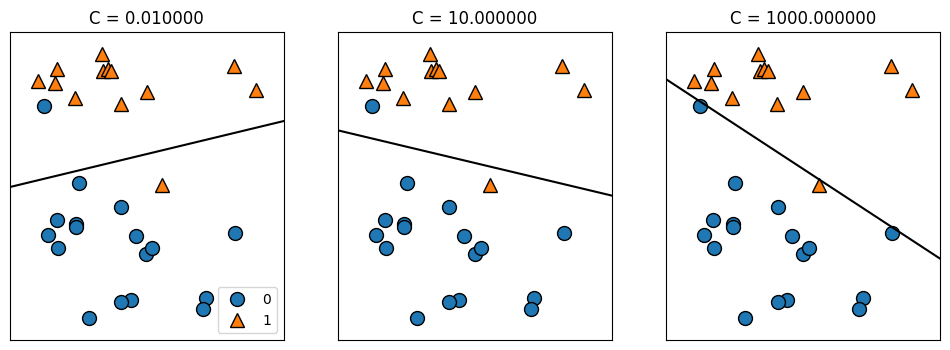

In [2]:
mglearn.plots.plot_linear_svc_regularization()

On the lefthand side, we have a very small C corresponding to a lot of regularization.
 Most of the points in class 0 are at the top, and most of the points in class 1 are at the
 bottom. The strongly regularized model chooses a relatively horizontal line, misclassifying two points. <br><br>
 In the center plot, C is slightly higher, and the model focuses more
 on the two misclassified samples, tilting the decision boundary. <br><br>
 Finally, on the right
hand side, the very high value of C in the model tilts the decision boundary a lot, now
 correctly classifying all points in class 0. One of the points in class 1 is still misclassified, as it is not possible to correctly classify all points in this dataset using a straight
 line. The model illustrated on the righthand side tries hard to correctly classify all
 points, but might not capture the overall layout of the classes well. In other words,
 this model is likely overfitting.

Analyze LinearLogistic in more detail on the Breast Cancer dataset:

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


c:\Users\Israk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 The default value of C=1 provides quite good performance, with 95% accuracy on
 both the training and the test set. But as training and test set performance are very
 close, it is likely that we are underfitting. Let's try to increase C to fit a more flexible
 model:

In [4]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.972


Using C=100 results in higher training set accuracy, and also a slightly increased test
 set accuracy, confirming our intuition that a more complex model should perform
 better. <br><br>
 We can also investigate what happens if we use an even more regularized model than
 the default of C=1, by setting C = 0.01 :

In [5]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.937
Test set score: 0.930


c:\Users\Israk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finally, let’s look at the coefficients learned by the models with the three different settings of the regularization parameter C

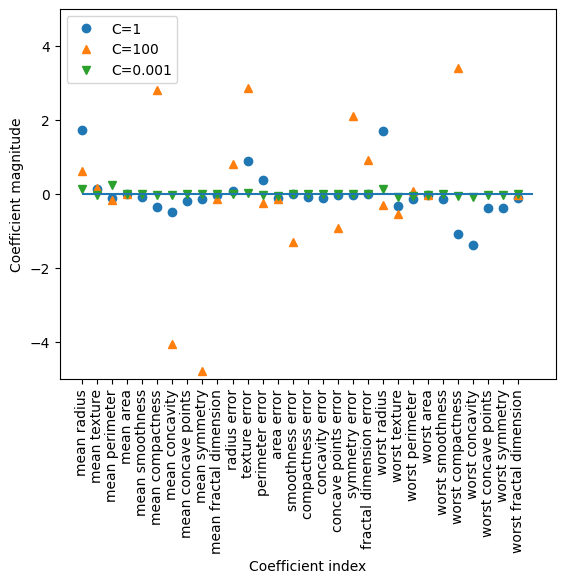

In [6]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

As LogisticRegression applies an L2 regularization by default,
 the result looks similar to that produced by Ridge.<br><br>
 Stronger regularization pushes coefficients more and more toward
 zero, though coefficients never become exactly zero.<br><br>
 Inspecting the plot more closely, we can also see an interesting effect in the third
 coefficient, for “mean perimeter.” <br><br>
 For C=100 and C=1, the coefficient
 is negative, while for C=0.001, the coefficient is positive, with a
 magnitude that is even larger than for C=1. <br> Interpreting a model
 like this, one might think the coefficient tells us which class a feature is associated with. For example, one might think that a high
 “texture error” feature is related to a sample being “malignant.” <br><br>
 However, the change of sign in the coefficient for “mean perimeter”
 means that depending on which model we look at, a high “mean
 perimeter” could be taken as being either indicative of “benign” or
 indicative of “malignant.” This illustrates that interpretations of
 coefficients of linear models should always be taken with a grain of
 salt.

If we desire a more interpretable model, using <strong>L1 regularization</strong> might help, as it limits the model to using only a few features. Here is the coefficient plot and classification accuracies for L1 regularization

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


c:\Users\Israk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


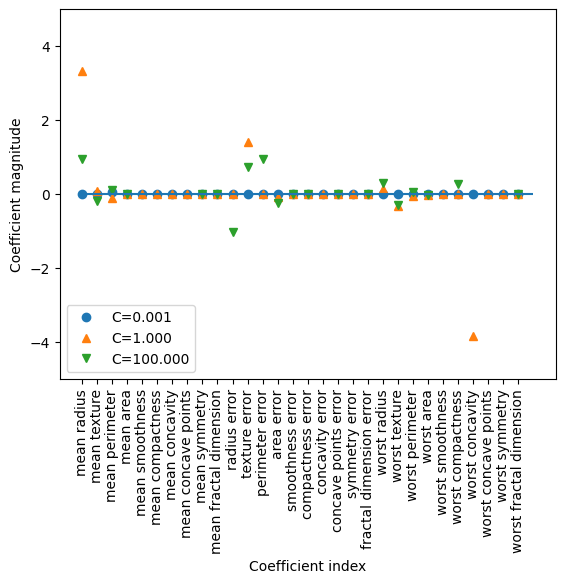

In [8]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_train, y_train)
    
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))

    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))

    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))


plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)